#### Predicting Estate Value :

1. DESCRIPTION OF THE DATA:

A. Contains details of properties of Gurgaon, Hyderabad, Mumbai, Kolkata cities of India.

B. All datasets of different cities contains almost 10K properties.

C. Target column: PRICE

2. Data Usage :
This dataset can be used for various real estate-related tasks, including:
A. Property price prediction.

B. Market analysis to identify trends and patterns.

C. Identifying popular property types and locations.

D. Evaluating the impact of property attributes on price.

# Importing Table & Librarys :

In [1]:
## For Data Manupulation:
import pandas as pd

## For Scientific Calculation :
import numpy as np

## For Data Visualization :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## For Data Warning :
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\gurgaon_10k.csv")
df2 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\hyderabad.csv")
df3 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\kolkata.csv")
df4 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\mumbai.csv")

df = pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)
df.sample(5)

,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,ALT_TAG,PRODUCT_TYPE,PROPERTY_TYPE__U,SECONDARY_AREA,VALUE_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SUPER_AREA,SUPERAREA_UNIT
28868,X70469986,NaN,NaN,R,Unitech vistas is one of kolkata east's most s...,Residential Apartment,Kolkata East,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36822,O70284476,NaN,NaN,S,Located in the popular residential address of ...,Residential Apartment,Mumbai South West,NaN,1.0,1,...,NaN,PREMIUM_LISTING,1.0,186.27 sq.m.,Freehold,2023-07-17 15:28:26,1 month ago,[],NaN,NaN
8863,O6589925,https://mediacdn.99acres.com/media1/14762/12/2...,https://mediacdn.99acres.com/media1/14762/12/2...,S,Alll sizes with us. 500 sq.Yd brand new builde...,Independent/Builder Floor,Gurgaon,DLF Phase 2,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18489,B70880100,NaN,NaN,R,It's good gatted cummunti apartment and all'am...,Residential Apartment,Hyderabad,NaN,NaN,0,...,Vajras Jasmine County Hall,PREMIUM_LISTING,1.0,161.65 sq.m.,NaN,2023-08-21 17:01:33,5 days ago,[],NaN,NaN
23534,D69268742,NaN,NaN,S,Ps aurus luxurious residential project on em b...,Residential Apartment,Kolkata East,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preliminary information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38502 entries, 0 to 38501
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROP_ID                       38502 non-null  object 
 1   PHOTO_URL                     8864 non-null   object 
 2   MEDIUM_PHOTO_URL              8864 non-null   object 
 3   PREFERENCE                    38502 non-null  object 
 4   DESCRIPTION                   38502 non-null  object 
 5   PROPERTY_TYPE                 38502 non-null  object 
 6   CITY                          38502 non-null  object 
 7   LOCALITY                      10704 non-null  object 
 8   TRANSACT_TYPE                 31988 non-null  float64
 9   OWNTYPE                       38502 non-null  int64  
 10  BEDROOM_NUM                   34948 non-null  float64
 11  BATHROOM_NUM                  10704 non-null  float64
 12  BALCONY_NUM                   28505 non-null  float64
 13  P

In [4]:
data = pd.DataFrame(df.isna().sum())
data

,0
PROP_ID,0
PHOTO_URL,29638
MEDIUM_PHOTO_URL,29638
PREFERENCE,0
DESCRIPTION,0
...,...
REGISTER_DATE__U,19501
REGISTERED_DAYS,19501
PRIMARY_TAGS,19501
SUPER_AREA,37682


In [5]:
df = df.drop(['SUPERAREA_UNIT','SUPER_AREA','PRIMARY_TAGS','REGISTERED_DAYS','REGISTER_DATE__U',
              'VALUE_LABEL','SECONDARY_AREA','PROPERTY_TYPE__U','PRODUCT_TYPE','ALT_TAG','VERIFIED','PROJ_ID',
              'PROPERTY_NUMBER','RES_COM','CLASS','UPDATE_DATE','POSTING_DATE','SPID','FURNISHING_ATTRIBUTES',
              'QUALITY_SCORE','COMMON_FURNISHING_ATTRIBUTES','SUPER_SQFT','BUILTUP_SQFT','metadata','xid',
              'profile','CONTACT_COMPANY_NAME','THUMBNAIL_IMAGES','PROPERTY_IMAGES','PROP_DETAILS_URL',
              'GROUP_NAME','PD_URL','TOP_USPS','FSL_Data','BROKERAGE','SUPERBUILTUP_SQFT','CARPET_SQFT',
              'BATHROOM_NUM','MEDIUM_PHOTO_URL','PHOTO_URL','LOCALITY','CONTACT_NAME','DEALER_PHOTO_URL',
              'CITY_ID','LOCALITY_WO_CITY','LISTING','FORMATTED','AMENITIES'],axis=1)
#### That all column contain missing values more than 70%.

In [6]:
del df['PRICE_SQFT']  
del df['PRICE_PER_UNIT_AREA']    
### Price value contains more valuable containts

In [7]:
del df['PRICE']
del df['MAX_PRICE']
df.rename(columns={"MIN_PRICE":'Estate_price'},inplace=True)     ### thats three columns contain samme value

In [8]:
del df['CLASS_HEADING']  ## In Column CLASS_LABEL values are more sorted. 

In [9]:
del df['location']    #### Its Contains only Repeated Values in Column

In [10]:
df = df.drop(['TRANSACT_TYPE','PROP_HEADING','PROP_ID','SOCIETY_NAME','BUILDING_NAME','FORMATTED_LANDMARK_DETAILS','EXPIRY_DATE','REGISTER_DATE','PROP_NAME','BUILDING_ID','MAP_DETAILS'],axis = 1)   ### This Column values are unique in nature so, These values Doesnt improve Model performace.

In [11]:
df.columns

Index(['PREFERENCE', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'OWNTYPE',
       'BEDROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'FEATURES', 'Estate_price', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'AREA', 'CLASS_LABEL', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT'],
      dtype='object')

In [12]:
df['AGE'].value_counts()
df['AGE']=df['AGE'].astype(object)
# 1 :1-5 Year Old Property
# 2 :5-10 Year Old Property
# 3 :10+ Year Old Property
# 5 :Under Construction
# 6 :0-1 Year Old Property

In [13]:
df['MAX_AREA_SQFT']
df['MIN_AREA_SQFT']      ### these two columns have same values at every row.
del df['MAX_AREA_SQFT']
df.rename(columns={"MIN_AREA_SQFT":"Buildup_Area"},inplace = True)

In [14]:
df['AREA'] = df['AREA'].str.replace(r'\D', '')      ### It indicate area of property
df['AREA']=df['AREA'].astype(int)
df.rename(columns={'AREA':"Property_Area"},inplace = True)

In [15]:
df['FEATURES'] = df['FEATURES'].str.split(',')
df['FEATURES'] = df['FEATURES'].str.len()                     ### This column indicate number of Amenities

In [16]:
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("G","0")   ### G indicate Ground Floor
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("L","0")   ### L indicate Lowest Ground Floor
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("B","0")   ### B indicate Basement.
df['FLOOR_NUM'] = df['FLOOR_NUM'].astype(np.number)

In [17]:
df['BEDROOM_NUM'] = np.nan_to_num(df['BEDROOM_NUM'])
df['BALCONY_NUM'] = np.nan_to_num(df['BALCONY_NUM'])     ### Converting Null Values into zeroes.

In [18]:
pd.DataFrame(df.isna().sum())

,0
PREFERENCE,0
DESCRIPTION,0
PROPERTY_TYPE,0
CITY,0
OWNTYPE,0
BEDROOM_NUM,0
BALCONY_NUM,0
FURNISH,0
FACING,0
AGE,0


In [19]:
df['AGE'] = df['AGE'].map({1: '1-5 Year Old Property', 2: '5-10 Year Old Property', 3: '10+ Year Old Property',5:'Under Construction',6:'0-1 Year Old Property'})
df.tail()
# 1 :1-5 Year Old Property
# 2 :5-10 Year Old Property
# 3 :10+ Year Old Property
# 5 :Under Construction
# 6 :0-1 Year Old Property

,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT
38497,S,"Book your 1 BHK apartment in Marathon Nexzone,...",Residential Apartment,Navi Mumbai,1,1.0,0.0,0,0,Under Construction,1.0,33.0,1,5040000.0,39.019260,420,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0
38498,S,"Book your 3 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,1,3.0,0.0,0,0,Under Construction,1.0,41.0,1,13000000.0,98.848792,1064,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38499,S,Experience a new style of living with The High...,Residential Apartment,Navi Mumbai,1,2.0,0.0,0,0,Under Construction,1.0,41.0,1,8000000.0,56.206315,605,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38500,S,"Book your 1 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,1,1.0,0.0,0,0,Under Construction,1.0,41.0,1,5500000.0,38.368939,413,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38501,S,Hiranandani Fortune City is a ready to move pr...,Residential Apartment,Navi Mumbai,1,3.0,0.0,0,0,0-1 Year Old Property,1.0,34.0,1,16000000.0,129.971297,1399,Dealer,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",7.0


In [20]:
df['FACING'] = df['FACING'].map({1: 'North', 2: 'South', 3: 'East',4:'West',5:'North_East',6:'North_west',7:'South_east',8:'South_west',0:'East'})

In [21]:
df['FURNISH'].value_counts()

4    12774
0    10879
2    10685
1     4164
Name: FURNISH, dtype: int64

In [22]:
df['FURNISH'] = df['FURNISH'].map({1: 'Furnished', 2: 'Unfernished', 0: 'Furnished',4:'Semifurnished'})

In [23]:
df['OWNTYPE'] = df['OWNTYPE'].map({1: 'FreeHold', 2: 'Lease', 3: 'Co_operative_society',4:'Power_attory',0:'FreeHold'})
df.tail()

,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT
38497,S,"Book your 1 BHK apartment in Marathon Nexzone,...",Residential Apartment,Navi Mumbai,FreeHold,1.0,0.0,Furnished,East,Under Construction,1.0,33.0,1,5040000.0,39.019260,420,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0
38498,S,"Book your 3 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,FreeHold,3.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,13000000.0,98.848792,1064,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38499,S,Experience a new style of living with The High...,Residential Apartment,Navi Mumbai,FreeHold,2.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,8000000.0,56.206315,605,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38500,S,"Book your 1 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,FreeHold,1.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,5500000.0,38.368939,413,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38501,S,Hiranandani Fortune City is a ready to move pr...,Residential Apartment,Navi Mumbai,FreeHold,3.0,0.0,Furnished,East,0-1 Year Old Property,1.0,34.0,1,16000000.0,129.971297,1399,Dealer,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",7.0


<Axes: >

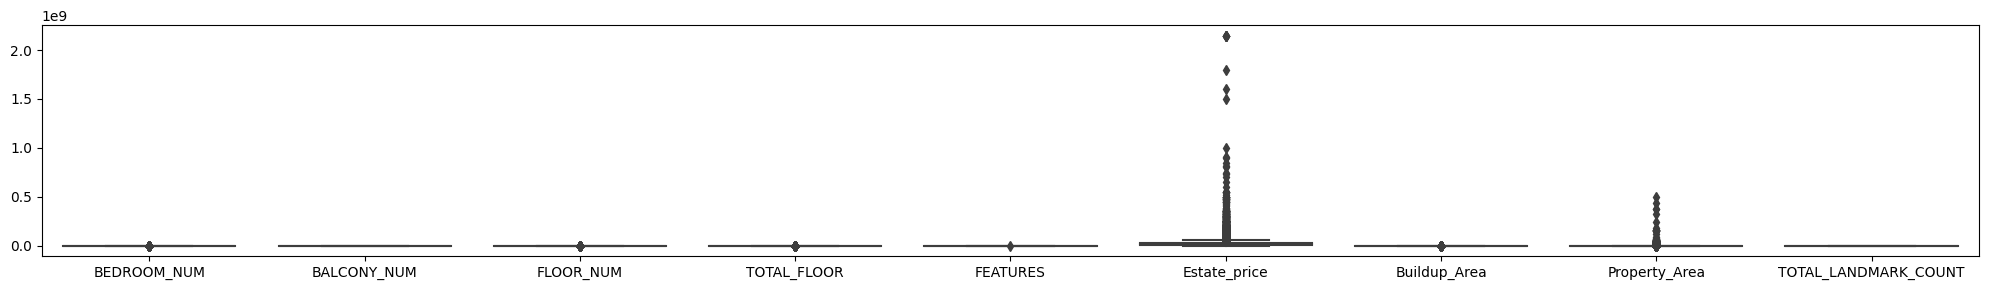

In [24]:
plt.figure(figsize=(25,3))
sns.boxplot(df)

In [25]:
df['TOTAL_FLOOR'] = df['TOTAL_FLOOR'].fillna(df['TOTAL_FLOOR'].median())
df['FLOOR_NUM'] = df['FLOOR_NUM'].fillna(df['FLOOR_NUM'].median())
df['AGE'] = df['AGE'].fillna(df['AGE'].mode()[0])
df['OWNTYPE'] = df['OWNTYPE'].astype(str)
df['FURNISH'] = df['FURNISH'].astype(str)
df['TOTAL_LANDMARK_COUNT'] = df['TOTAL_LANDMARK_COUNT'].fillna(df['TOTAL_LANDMARK_COUNT'].mean())
df = df.dropna(subset='Estate_price')

In [26]:
pd.DataFrame(df.isna().sum())

,0
PREFERENCE,0
DESCRIPTION,0
PROPERTY_TYPE,0
CITY,0
OWNTYPE,0
BEDROOM_NUM,0
BALCONY_NUM,0
FURNISH,0
FACING,0
AGE,0


In [27]:
for i in df.select_dtypes(include= np.number):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q1 - 1.5*iqr
    ll = q3 + 1.5*iqr
    df[i].clip(ll,ul,inplace= True)

<Axes: >

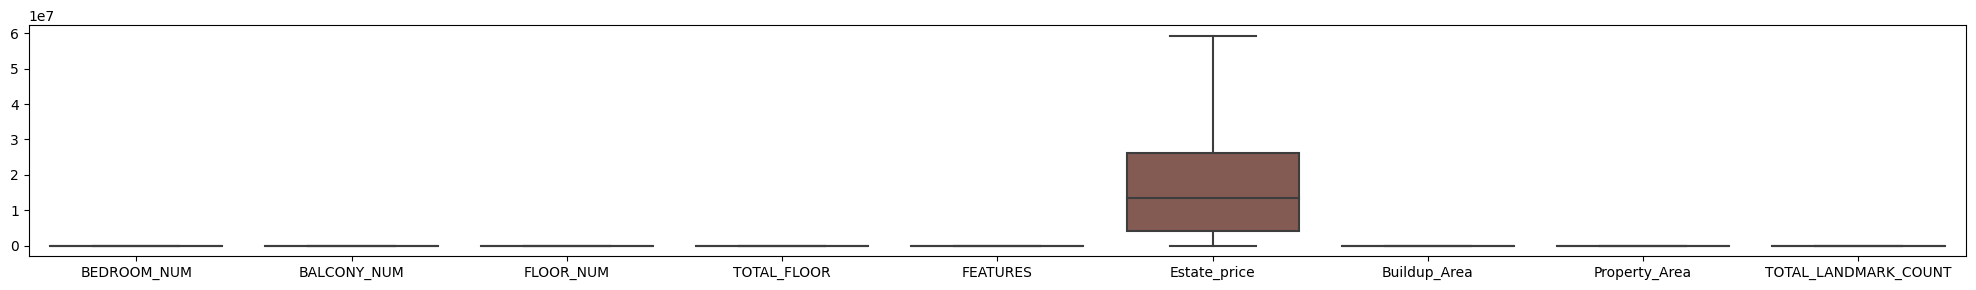

In [28]:
plt.figure(figsize=(25,3))
sns.boxplot(df)

In [29]:
nlp = df['DESCRIPTION']
df = df.drop(['DESCRIPTION','SECONDARY_TAGS'],axis=1)

In [30]:
df.head()

,PREFERENCE,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,TOTAL_LANDMARK_COUNT
0,S,Residential Apartment,Gurgaon,FreeHold,4.0,4.0,Semifurnished,North,5-10 Year Old Property,14.0,26.0,18,26300000.0,319.028902,3434,Dealer,10.0
1,S,Residential Apartment,Gurgaon,FreeHold,4.0,3.0,Semifurnished,North,1-5 Year Old Property,7.0,29.0,22,36000000.0,266.631610,2870,Dealer,9.0
2,R,Residential Apartment,Gurgaon,FreeHold,3.0,2.0,Furnished,West,1-5 Year Old Property,7.0,17.0,29,85000.0,181.160850,1950,Dealer,14.0
3,S,Residential Apartment,Gurgaon,FreeHold,3.0,3.0,Semifurnished,East,1-5 Year Old Property,14.0,28.0,17,38500000.0,260.314206,2802,Dealer,8.0
4,R,Residential Apartment,Gurgaon,FreeHold,3.0,4.0,Semifurnished,North_west,1-5 Year Old Property,12.0,27.0,18,40000.0,212.747870,2290,Dealer,14.0


# Perform Encoder :

In [31]:
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.tail()

,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,...,South_west,West,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner
38497,1.0,0.0,1.0,33.0,1,5040000.0,39.019260,420,9.0,0,...,0,0,0,0,0,0,1,0,1,0
38498,3.0,0.0,1.0,41.0,1,13000000.0,98.848792,1064,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38499,2.0,0.0,1.0,41.0,1,8000000.0,56.206315,605,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38500,1.0,0.0,1.0,41.0,1,5500000.0,38.368939,413,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38501,3.0,0.0,1.0,34.0,1,16000000.0,129.971297,1399,7.0,0,...,0,0,1,0,0,0,0,0,1,0


In [32]:
Final_df = df.copy()

In [33]:
Final_df['Estate_price'] = np.sqrt(np.sqrt(Final_df['Estate_price']))

In [34]:
from sklearn.model_selection import train_test_split
x = Final_df.drop('Estate_price',axis=1)
y = Final_df['Estate_price']

X_train, X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.3,random_state=123)

# Model Buliding:

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [36]:
Algorithms = [["1. LinearRegression :",LinearRegression()],
             ["2. Ridge :",Ridge()],
             ["3. Lasso :",Lasso()],
             ["4. DecisionTreeRegressor :",DecisionTreeRegressor()],
             ["5. RandomForestRegressor :",RandomForestRegressor()],
             ["6. KNN :",KNeighborsRegressor()],
             ["7. GradientBoostingRegressor :",GradientBoostingRegressor()],
             ["8. AdaBoostRegressor :",AdaBoostRegressor()],
             ["9. XGBRegressor :",XGBRegressor()]]

In [37]:
R2_train_ = []
rmse_train = []
R2_test_ = []
rmse_test = []


for name , model in Algorithms:
    model.fit(X_train,Y_train)
    Train_pre = model.predict(X_train)
    Test_pre = model.predict(X_test)
    R2_train = round(r2_score(Y_train,Train_pre)*100,2)
    R2_train_.append(R2_train)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train,Train_pre)),2)
    rmse_train.append(RMSE_train)
    R2_test = round(r2_score(Y_test,Test_pre)*100,2)
    R2_test_.append(R2_test)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test,Test_pre)),2)
    rmse_test.append(RMSE_test)

In [38]:
Algorithms = ["LinearRegression","Ridge","Lasso","DecisionTree","RandomForest","KNN","GBoosting","AdaBoost","XGB"]
ab = {"Algorithms":Algorithms,
      "R2_train_":R2_train_,
      "R2_test_":R2_test_,
      "rmse_train":rmse_train,
      "rmse_test":rmse_test}
ab = pd.DataFrame(ab)
ab = ab.set_index('Algorithms')
cd = ab.style.applymap(lambda x: 'background-color: green' if ( (x < 90 and x > 70) or x < 10) else "background-color: orange" )
cd

,R2_train_,R2_test_,rmse_train,rmse_test
Algorithms,,,,
LinearRegression,81.440000,82.170000,10.060000,9.810000
Ridge,81.440000,82.180000,10.060000,9.810000
Lasso,77.220000,77.760000,11.140000,10.960000
DecisionTree,99.130000,78.460000,2.180000,10.780000
RandomForest,97.610000,87.110000,3.610000,8.340000
KNN,56.210000,32.870000,15.450000,19.040000
GBoosting,84.880000,84.650000,9.080000,9.100000
AdaBoost,68.050000,66.440000,13.200000,13.460000
XGB,94.120000,87.550000,5.660000,8.200000


Text(0.5, 0, 'Test_RMSE_Score')

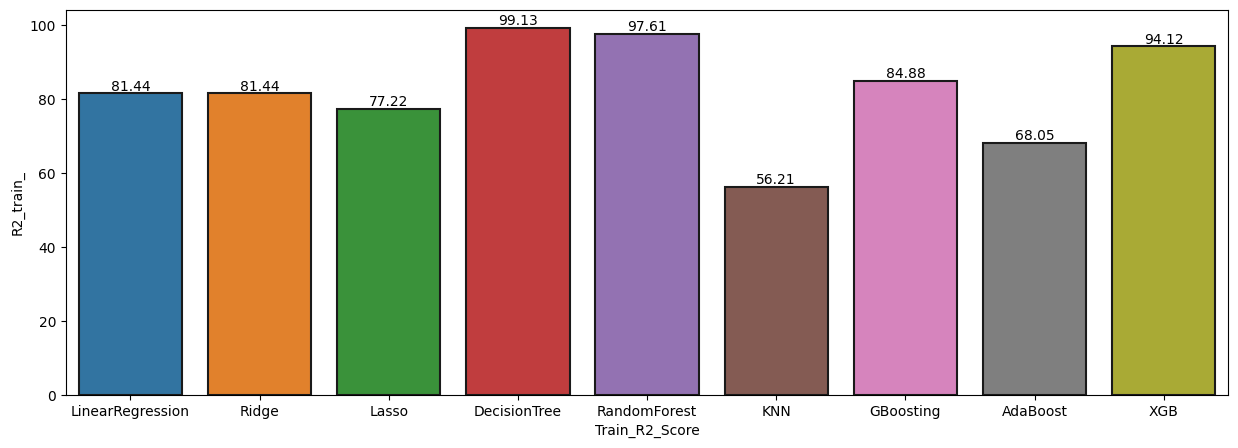

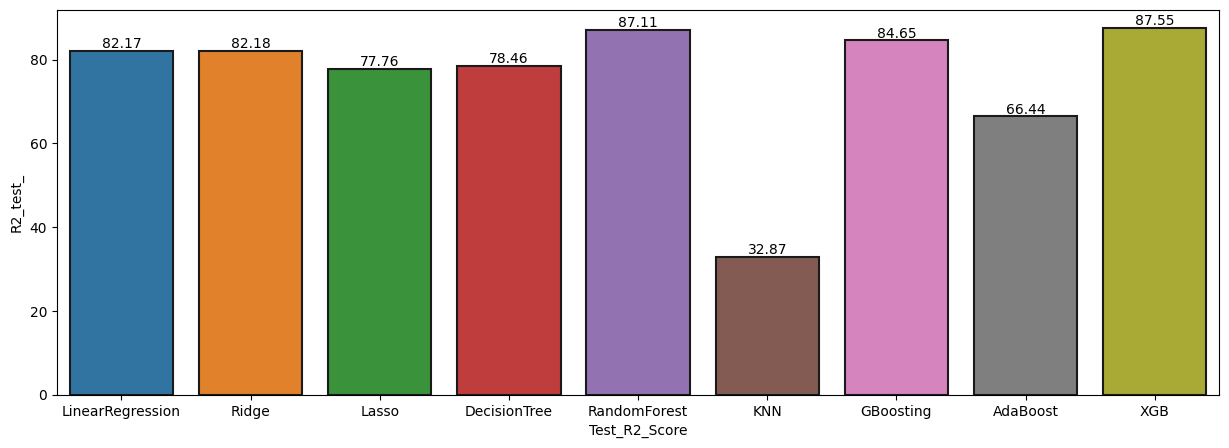

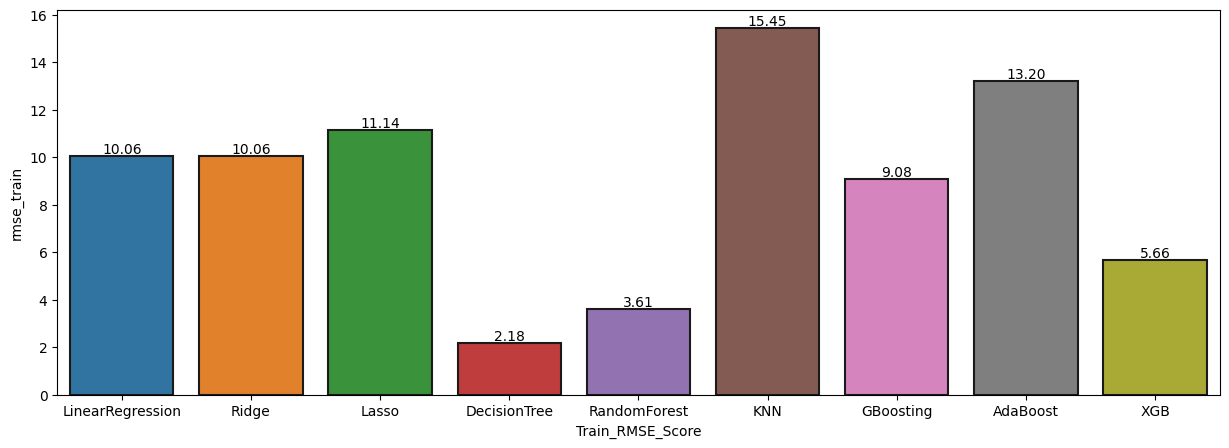

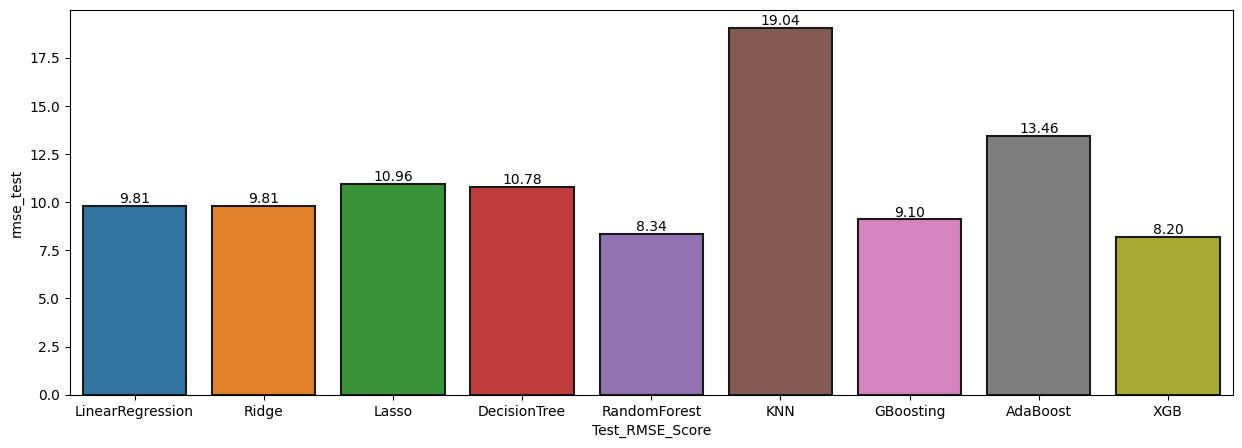

In [39]:
plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y =ab['R2_train_'] ,linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_R2_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['R2_test_'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_R2_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_train'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_RMSE_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_test'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_RMSE_Score")

### HyperParameter Tunning :

In [40]:
## DT :
params = {"max_depth":[3,4,5],
         "min_samples_split":[100,110,120],
         "min_samples_leaf":[50,60,70]}

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(DecisionTreeRegressor(),
                     params,
                     verbose = 1,
                     cv = 10)
gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [100, 110, 120]},
             verbose=1)

In [41]:
DT = gridcv.best_params_
DT

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [42]:
## RF :
params = {"max_depth":[3,4,5],
         "min_samples_split":[100,110,120],
         "min_samples_leaf":[50,60,70],
         'n_estimators':[25,50]}

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(RandomForestRegressor(),
                     params,
                     verbose = 1,
                     cv = 10)
gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [100, 110, 120],
                         'n_estimators': [25, 50]},
             verbose=1)

In [43]:
RF = gridcv.best_params_
RF

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 120,
 'n_estimators': 25}

In [44]:
## XGboosting :
params = {"max_depth":[3,4,5],
         "min_samples_split":[100,110,120],
         "min_samples_leaf":[50,60,70],
         'n_estimators':[25,50],
         'learning_rate':[0.7,0.8,0.6],
         'reg_lambda':[0,1,2]}

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(XGBRegressor(),
                     param_grid=params,
                     verbose = 1,
                     cv = 10,
                     n_jobs=-1,
                     scoring='accuracy')
gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.8, 0.6],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [100, 110, 120],
                         'n_estimators': [25, 50], 'reg_lambda': [0, 1, 2]},
             scoring='accuracy', verbose=1)

In [45]:
XGB = gridcv.best_params_
XGB

{'learning_rate': 0.7,
 'max_depth': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 25,
 'reg_lambda': 0}

In [46]:
Algorithms = [["1. DecisionTreeRegressor :",DecisionTreeRegressor(**DT)],
             ["2. RandomForestRegressor :",RandomForestRegressor(**RF)],
             ["3. GradientBoostingRegressor :",GradientBoostingRegressor()],
             ["4. XGBRegressor :",XGBRegressor(**XGB)]]

In [47]:
R2_train_ = []
rmse_train = []
R2_test_ = []
rmse_test = []


for name , model in Algorithms:
    model.fit(X_train,Y_train)
    Train_pre = model.predict(X_train)
    Test_pre = model.predict(X_test)
    R2_train = round(r2_score(Y_train,Train_pre)*100,2)
    R2_train_.append(R2_train)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train,Train_pre)),2)
    rmse_train.append(RMSE_train)
    R2_test = round(r2_score(Y_test,Test_pre)*100,2)
    R2_test_.append(R2_test)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test,Test_pre)),2)
    rmse_test.append(RMSE_test)

In [48]:
Algorithms = ["DecisionTree","RandomForest","GBoosting","XGB"]
ab = {"Algorithms":Algorithms,
      "R2_train_":R2_train_,
      "R2_test_":R2_test_,
      "rmse_train":rmse_train,
      "rmse_test":rmse_test}
ab = pd.DataFrame(ab)
ab = ab.set_index('Algorithms')
cd = ab.style.applymap(lambda x: 'background-color: green' if ( (x < 90 and x > 70) or x < 10) else "background-color: orange" )
cd

,R2_train_,R2_test_,rmse_train,rmse_test
Algorithms,,,,
DecisionTree,81.100000,81.070000,10.150000,10.110000
RandomForest,81.730000,81.720000,9.980000,9.930000
GBoosting,84.880000,84.650000,9.080000,9.100000
XGB,86.010000,85.120000,8.730000,8.960000


Text(0.5, 0, 'Test_RMSE_Score')

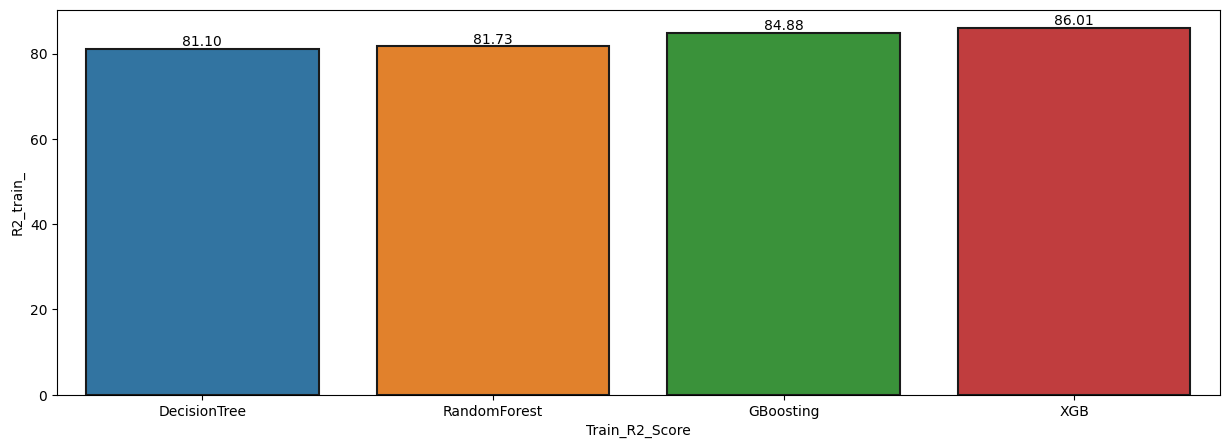

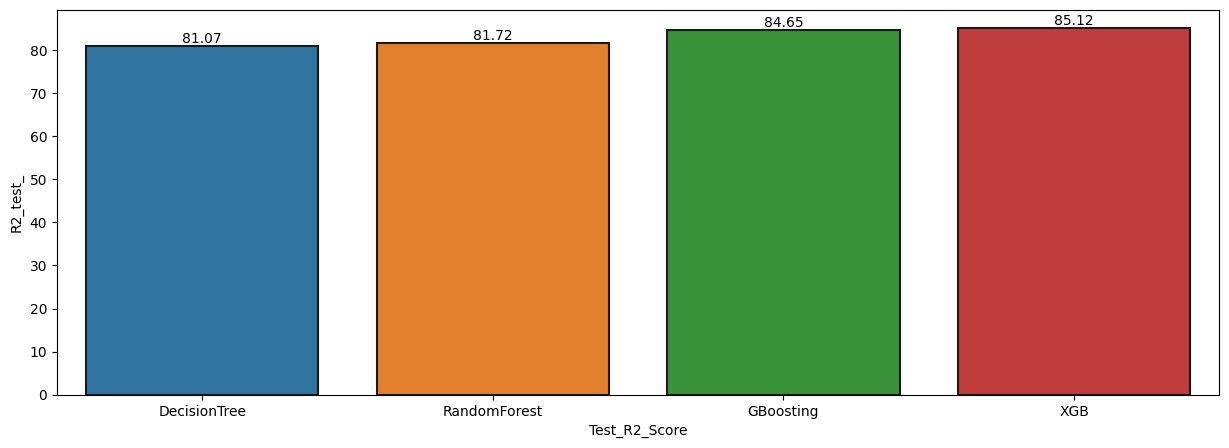

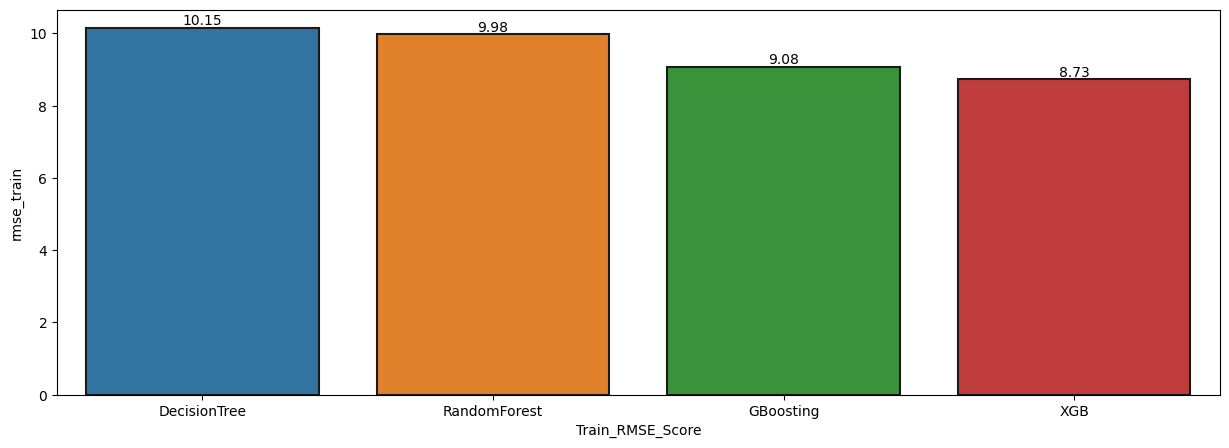

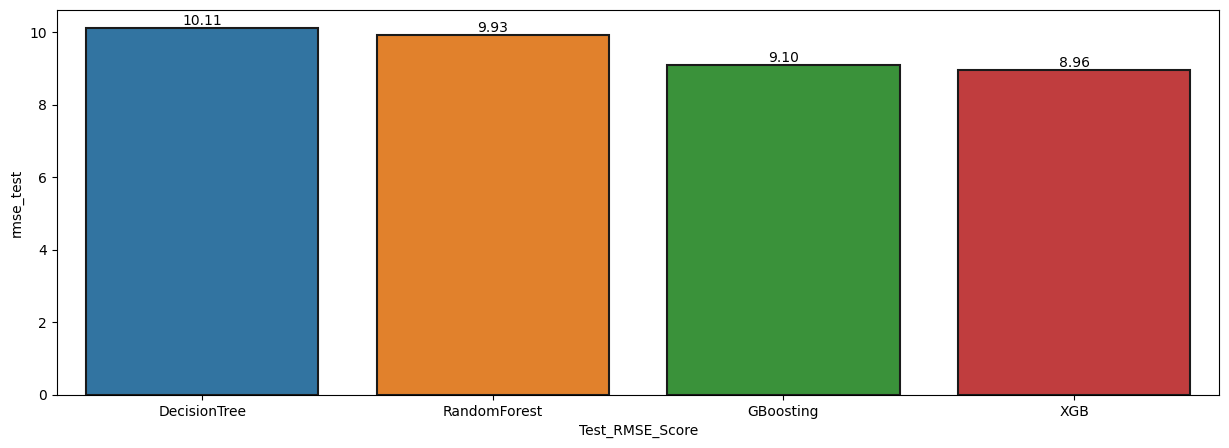

In [49]:
plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y =ab['R2_train_'] ,linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_R2_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['R2_test_'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_R2_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_train'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_RMSE_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_test'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_RMSE_Score")